In [1]:
## Required libraries

import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
## customized function for graph labels
def graph_label(rects,labels):
# attach some text labels
    for rect,label in zip(rects,labels):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, label,
              ha='center', va='bottom')
    return

In [3]:
## customized function for graph plot

def graph_plot(x,title,label):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12,12))
    ax = sns.barplot(x.index, x.values, alpha = 0.8) # adjust transparency (alpha) 
    plt.title(title,fontsize = 12)
    plt.ylabel(label,fontsize = 12)
    plt.xlabel('Label',fontsize=12)

  # Display count in each class over columns in a bar chart
    rects = ax.patches
    labels = x.values
    graph_label(rects,labels)

    plt.show()

In [4]:
## Reading training data
df_train = pd.read_csv('train.csv')

In [5]:
## training data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [6]:
## sample data
df_train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [7]:
# To check if there are any missing labels

x = df_train.iloc[:,3:].sum()
labelsum = df_train.iloc[:,2:].sum(axis = 1)
labels = 0

for sum in labelsum.items():
    if sum == 0:
        labels += 1

print("Total number of articles = ",len(df_train))
print("Total number of articles without label = ",labels)
print("total labels = ",x.sum())

Total number of articles =  20972
Total number of articles without label =  0
total labels =  26267


In [8]:
## checking for missing values

print("Number of missing value in train data: ",df_train.isnull().sum())

Number of missing value in train data:  ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64


C:\Users\vedan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


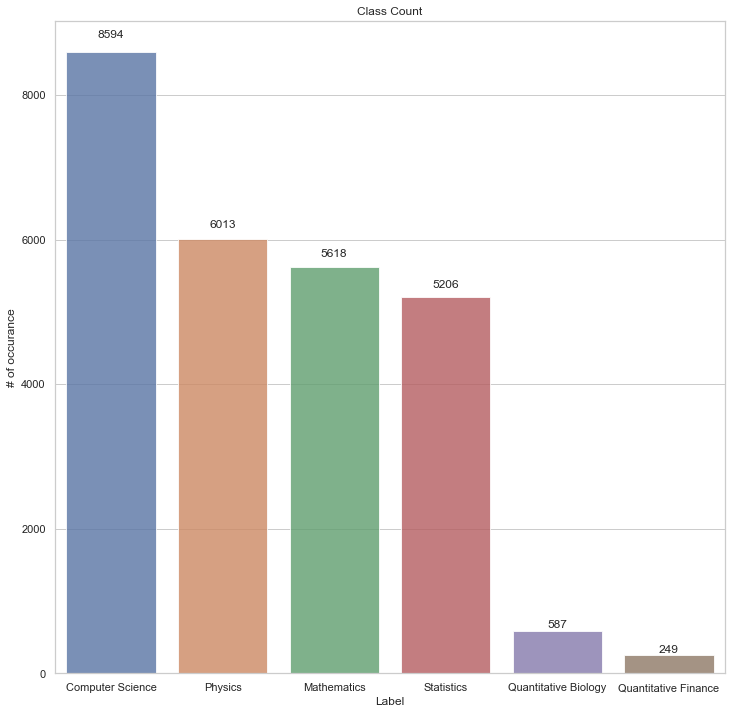

In [9]:
## To visualize the proportion of labels
x = df_train.iloc[:,3:].sum()
graph_plot(x,title = 'Class Count',label='# of occurance')

C:\Users\vedan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


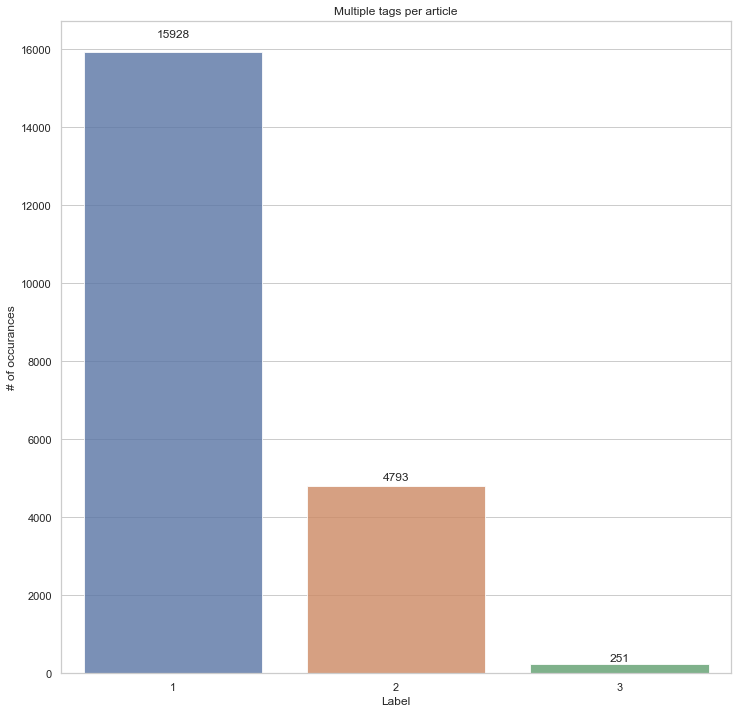

In [10]:
## number of labels for each article
labelsum = df_train.iloc[:,2:].sum(axis = 1)
x = labelsum.value_counts() 
graph_plot(x,title = 'Multiple tags per article', label = '# of occurances')

In [11]:
## To get top frequent words from the corpus

def get_top_n_words(n_top_word ,data):
    vectorizer = TfidfVectorizer(stop_words = 'english') #initialize the vectorizer to remove stop words
    transformed_vectorizer = vectorizer.fit_transform(data)
  
    vectorized_total = np.sum(transformed_vectorizer, axis = 0) # column wise addition

    word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
    word_value = np.flip(np.sort(vectorized_total)[0,:],1)
    word_vector = np.zeros((n_top_word,vectorized_total.shape[1]))

    for i in range(n_top_word):
        word_vector[i,word_indices[0,i]] = 1

    inverse_vectorizer = vectorizer.inverse_transform(word_vector)

    words = [word[0] for word in inverse_vectorizer]
    return(words, word_value[0,:n_top_word].tolist()[0])

In [12]:
## Splitting data since kaggle didnot provide test data labels

y = df_train.drop(['ID','TITLE','ABSTRACT'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_train['ABSTRACT'], y, test_size=0.33, random_state=42)

In [13]:
## Only considering abstract field

train_text = X_train
test_text = X_test

In [35]:
len(test_text)

6921

In [14]:
## To analyse the frequency of top words in the corpus
words, words_count = get_top_n_words(n_top_word = 25,data = train_text.values)

<ipython-input-15-ff3a7bda7ffd>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation='vertical') # makes the word vertical


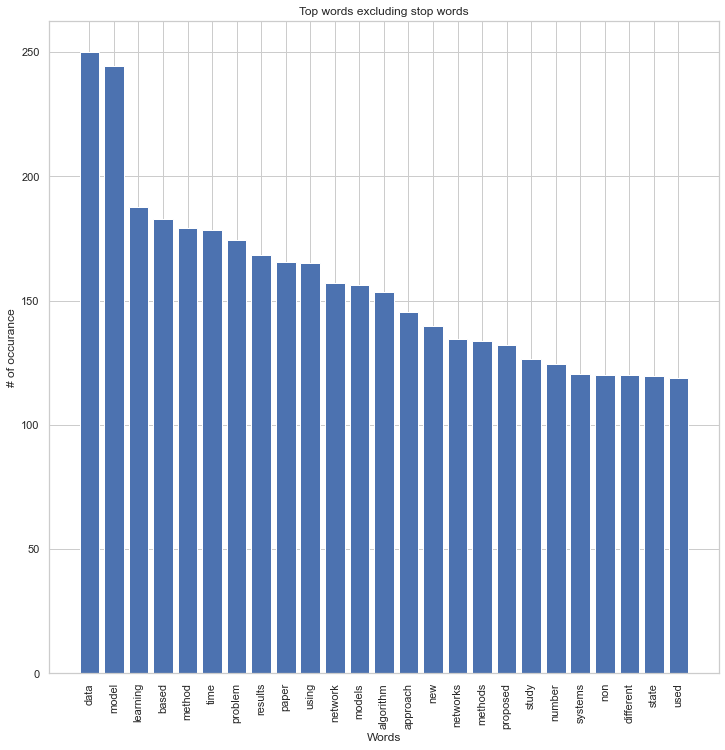

In [15]:
## To analyse the frequency of important words in the entire text
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize=(12,12)) # this is needed when you are using axis.bar
ax.bar(words,words_count) 
ax.set_xticklabels(words, rotation='vertical') # makes the word vertical
plt.title('Top words excluding stop words',fontsize = 12)
plt.ylabel('# of occurance',fontsize = 12)
plt.xlabel('Words',fontsize=12)
plt.show()

In [16]:
## function for vectorisation along with lemmatizing the words
lemmatizer = nltk.WordNetLemmatizer()
class CountVectorizer_lemmatizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer_lemmatizer, self).build_analyzer()
        return lambda doc:(lemmatizer.lemmatize(w) for w in analyzer(doc))

In [44]:
## Transforming training and test text data into vectors

text = list(train_text)

tf_vectorizer = CountVectorizer_lemmatizer(decode_error='ignore', max_df = 0.95,min_df=2,stop_words='english') 

tf = tf_vectorizer.fit_transform(text)

## test set
text_test = list(test_text)

tf_vectorizer_test = CountVectorizer_lemmatizer(decode_error='ignore', max_df = 0.95,min_df=2,stop_words='english') 

tf_test = tf_vectorizer_test.fit_transform(text_test)

In [45]:
len(train_text)

14051

In [46]:
## Modelling LDA for train and test set

n_topics = 6
lda = LatentDirichletAllocation(n_components = n_topics, max_iter=5, learning_method='online',learning_offset=50., random_state=0)

lda.fit(tf)

lda_topic_modelling = lda.fit_transform(tf)
lda_test = lda.fit_transform(tf_test)

## LSA

In [47]:
lsa = TruncatedSVD(1000)

In [48]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                             min_df=2, stop_words='english',
                             use_idf=True)

In [49]:
X_train_tfidf = vectorizer.fit_transform(text)
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_train_lsa = Normalizer(copy=False).fit_transform(X_train_lsa)
X_test_tfidf = vectorizer.transform(text_test)
X_test_lsa = lsa.transform(X_test_tfidf)
X_test_lsa = Normalizer(copy=False).transform(X_test_lsa)

In [50]:
## To find out the variance captured by LSA
explained_variance = lsa.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

  Explained variance of the SVD step: 49%


In [51]:
## Modelling a knn classifier using LSA transformed vectors

knn_lsa = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric='cosine')
knn_lsa.fit(X_train_lsa, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [52]:
## Modelling a knn classifier using LDA transformed vectors

knn_lda = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric='cosine')
knn_lda.fit(lda_topic_modelling, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [53]:
## LSA Prediction
lsa_p = knn_lsa.predict(X_test_lsa)

In [54]:
## LDA Prediction
lda_p = knn_lda.predict(lda_test)

In [55]:
## LSA Accuracy

correct = 0;
for i in range(0,len(lsa_p)):
    if (lsa_p[i]==y_test.values[i]).all():
        correct += 1

print("  (%d / %d) correct - %.2f%%" % (correct, len(y_test), float(correct) / float(len(y_test)) * 100.0))

  (4090 / 6921) correct - 59.10%


In [56]:
## LDA Accuracy

correct = 0;
for i in range(0,len(lda_p)):
    if (lda_p[i]==y_test.values[i]).all():
        correct += 1

print("  (%d / %d) correct - %.2f%%" % (correct, len(y_test), float(correct) / float(len(y_test)) * 100.0))

  (3285 / 6921) correct - 47.46%
